# Exercício - Mini Projeto de Análise de Dados

Vamos fazer um exercício completo de pandas para um miniprojeto de análise de dados.

Esse exercício vai obrigar a gente a usar boa parte dos conhecimento de pandas e até de outros módulos que já aprendemos ao longo do curso.

### O que temos?

Temos os dados de 2019 de uma empresa de prestação de serviços. 

- CadastroFuncionarios
- CadastroClientes
- BaseServiçosPrestados

Obs1: Para ler arquivos csv, temos o read_csv<br>
Obs2: Para ler arquivos xlsx (arquivos em excel normais, que não são padrão csv), temos o read_excel

### O que queremos saber/fazer?

1. Valor Total da Folha Salarial -> Qual foi o gasto total com salários de funcionários pela empresa? <br>
    Sugestão: calcule o salário total de cada funcionário, salário + benefícios + impostos, depois some todos os salários
    
    
2. Qual foi o faturamento da empresa?<br>
    Sugestão: calcule o faturamento total de cada serviço e depois some o faturamento de todos
    
    
3. Qual o % de funcionários que já fechou algum contrato?<br>
    Sugestão: na base de serviços temos o funcionário que fechou cada serviço. Mas nem todos os funcionários que a empresa tem já fecharam algum serviço.<br>
    . Na base de funcionários temos uma lista com todos os funcionários<br>
    . Queremos calcular Qtde_Funcionarios_Fecharam_Serviço / Qtde_Funcionários_Totais<br>
    . Para calcular a qtde de funcionários que fecharam algum serviço, use a base de serviços e conte quantos funcionários tem ali. Mas lembre-se, cada funcionário só pode ser contado uma única vez.<br><br>
    Dica: se você aplicar o método .unique() em uma variável que é apenas 1 coluna de um dataframe, ele vai excluir todos os valores duplicados daquela coluna.<br>
    Ex: unicos_colunaA = dataframe['colunaA'].unique() te dá como resposta uma lista com todos os itens da colunaA aparecendo uma única vez. Todos os valores repetidos da colunaA são excluidos da variável unicos_colunaA 
    
    
4. Calcule o total de contratos que cada área da empresa já fechou


5. Calcule o total de funcionários por área


6. Qual o ticket médio mensal (faturamento médio mensal) dos contratos?<br>
    Dica: .mean() calcula a média -> exemplo: media_colunaA = dataframe['colunaA'].mean()

Obs: Lembrando as opções mais usuais de encoding:<br>
encoding='latin1', encoding='ISO-8859-1', encoding='utf-8' ou então encoding='cp1252'

Observação Importante: Se o seu código der um erro na hora de importar os arquivos:<br>
- CadastroClientes.csv
- CadastroFuncionarios.csv

Use separador ";" (ponto e vírgula) para resolver

In [19]:
"""CTRL /   -> Comenta várias linhas de uma vez"""
import pandas as pd
import matplotlib.pyplot as plt

#Este CSV esta com os preços no padrão BR (usando virgula como separador)
#..então temos que usar 'Decimal' para apontar isso.
funcionarios_df = pd.read_csv('CadastroFuncionarios.csv', sep=';', decimal=',')

# # Agora onde haviam virgulas existem pontos no CSV
#display(funcionarios_df)

In [22]:

# -> Decimal troca do o separador virgula por ponto EX: 3,2 p; 3.2
#.. evitando erros na leitura do CSV

fun_df = pd.read_csv('CadastroFuncionarios.csv', sep=';', decimal=',')
Cod_Clien = pd.read_csv('CadastroClientes.csv', sep=';', decimal=',')
Bas_Serv = pd.read_excel('BaseServiçosPrestados.xlsx')



# Retirar Colunas 'Estado Civil' & 'Cargo' da Tab Funcionarios (AXIS=1 == Coluna 0 == Linha)
fun_df = fun_df.drop(['Estado Civil', 'Cargo'], axis=1) 

#display(fun_df)
display(Cod_Clien)
#display(Bas_Serv)
#print(Cod_Clien, Bas_Serv, fun_df)
#print(fun_df['Salario Total'])

,ID Cliente,Cliente,Valor Contrato Mensal
0,1,Teixeira Gonçalves,540
1,2,Souza Santos,1260
2,3,Emídio Alves,3195
3,4,Santos Costa,2520
4,5,Do Monteiro,3510
...,...,...,...
315,316,Manoel Costa,3690
316,317,Gomes Machado,2385
317,318,Alkindar Cardozo,3510
318,319,Pereira Fazenda,4185


### 1 - Folha Salarial

In [3]:

# Vamos mencionar o Nome de uma coluna Inexistente, assim ela será Criada no DF:

# DEU PAU
#fun_df['Salario_Total'] =  fun_df[['Salario Base', 'Impostos', 'Beneficios', 'VT', 'VR']].sum(axis=1)


# FUNCIONOU
fun_df['Salario_Total'] = fun_df.loc[:, 'Salario Base':'VR'].sum(axis=1)




#display(fun_df['Salario_Total'].sum())
res = fun_df['Salario_Total'].sum()
print(f'Total da Folha Salarial mensal: {res:,}R$')

Total da Folha Salarial mensal: 2,717,493.22R$


In [4]:
#display(Bas_Serv[['ID Cliente', 'Tempo Total de Contrato (Meses)']])
#display(Cod_Clien)

### 2 - Faturamento da empresa

In [5]:
# on='ID Cliente' -> É a unica Coluna que vai ser igual nas Duas Tabelas
faturamento_df = Bas_Serv[['ID Cliente', 'Tempo Total de Contrato (Meses)']].merge(Cod_Clien[['ID Cliente' ,'Valor Contrato Mensal']], on='ID Cliente')



faturamento_df['Faturamento Total'] = faturamento_df['Tempo Total de Contrato (Meses)'] * faturamento_df['Valor Contrato Mensal']




display(faturamento_df)
soma_ = sum(faturamento_df['Faturamento Total'])
print(f'Faturamento Total: {soma_:,}R$')

,ID Cliente,Tempo Total de Contrato (Meses),Valor Contrato Mensal,Faturamento Total
0,1,14,540,7560
1,2,12,1260,15120
2,4,14,2520,35280
3,5,8,3510,28080
4,6,8,2340,18720
...,...,...,...,...
232,315,4,1575,6300
233,316,8,3690,29520
234,317,6,2385,14310
235,319,14,4185,58590


Faturamento Total: 5,519,160R$


### 3 - Percentual % de funcionários que já fechou algum contrato

In [6]:
import numpy as np
#total_fun = sum(fun_df['ID Funcionário'])
#print(total_fun)


# MINHA SOLUÇÃO
# Total de Funcionários:
# tot = 0
# for J in fun_df['ID Funcionário']:
#     tot += 1
# print('Tot Fun Cadastrados: ',tot)




# METODO DO PROFESSOR (MELHOR):
tot = qtde_funcionario_total = len(funcionarios_df['ID Funcionário'])




# MINHA SOLUÇÃO:
# serv = 0
# for H in np.unique(Bas_Serv['ID Funcionário']):
#     serv += 1
# print('Tot Funcionarios Prestaram Serv: ',serv)

#METODO DO PROFESSOR (MELHOR QUE O MEU)
serv = qtde_funcionario_fecharamcontrato = len(Bas_Serv['ID Funcionário'].unique())
print(f'Total Funcionarios Fecharam Serv: {serv/tot:.2%}')


# MY WAY:
#print(f'Percentual de Funcionários que Prestaram Serviços: {serv/tot:.2%}')                

Total Funcionarios Fecharam Serv: 86.84%


### 4 - Total de contratos que cada área da empresa fechou

,ID Funcionário,Area
0,67,Financeiro
1,67,Financeiro
2,67,Financeiro
3,67,Financeiro
4,17,Logística
...,...,...
232,25,Administrativo
233,79,Operações
234,99,Administrativo
235,14,Financeiro


Administrativo    63
Operações         48
Comercial         44
Financeiro        42
Logística         40
Name: Area, dtype: int64

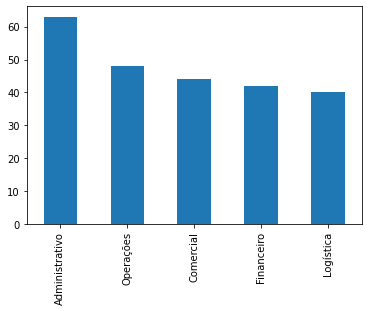

In [20]:
# recebe_informações.merge(Prove_Informações)

# Tab Bas_Serv[Coluna ID].recebe(fun_df[colunaID...])
contratos_area_df = Bas_Serv[['ID Funcionário']].merge(fun_df[['ID Funcionário', 'Area']], on='ID Funcionário')

display(contratos_area_df)


#VALUE_COUNTS -> CONTA QUANTAS VEZES QUANTIDADE DE OCORRENCIA DE UM NOME.
quant = contratos_area_df['Area'].value_counts()
display(quant)
quant.plot(kind='bar')
plt.show()

### 5 - Total de funcionários por área

Administrativo    26
Comercial         26
Operações         23
Logística         21
Financeiro        18
Name: Area, dtype: int64


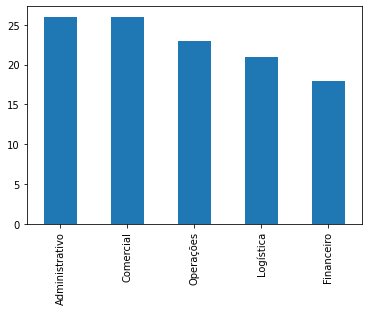

In [21]:
# qtd = fun_df['ID Funcionário'].vaule_counts()
# print(qtd)

#workers = fun_df[['ID Funcionário', 'Nome Completo']]
#print(workers['ID Funcionário'].value_counts())


# Quantas vezes cada ocorrência aparece por linha:
workers_area = fun_df['Area'].value_counts()
print(workers_area)

#workers_area.plot(kind='pie')
workers_area.plot(kind='bar')
plt.show()

### 6 - Ticket Médio Mensal

In [28]:
ticket_medio = Cod_Clien['Valor Contrato Mensal'].mean()
display(f'Val Ticket Médio: {ticket_medio:,}R$')


#print(Cod_Clien['Valor Contrato Mensal'])

'Val Ticket Médio: 2,502.5625R$'